In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Data/perceptron_data.csv")
df.head()

,x1,x2,class
0,2.339126,1.584585,1.0
1,1.557974,-0.570345,1.0
2,3.782852,4.813774,1.0
3,4.871110,4.768648,1.0
4,-0.024954,1.350122,1.0


In [4]:
X = np.array(df[['x1', 'x2']])
X[:5]

array([[ 2.33912642,  1.58458486],
       [ 1.55797438, -0.57034486],
       [ 3.78285229,  4.81377415],
       [ 4.87110971,  4.76864808],
       [-0.02495416,  1.35012155]])

In [5]:
y = np.array(df['class'])
y[:5]

array([1., 1., 1., 1., 1.])

In [6]:
X = np.hstack((np.array(df['x1']).reshape(-1,1), np.array(df['x2']).reshape(-1,1)))
X[:5]

array([[ 2.33912642,  1.58458486],
       [ 1.55797438, -0.57034486],
       [ 3.78285229,  4.81377415],
       [ 4.87110971,  4.76864808],
       [-0.02495416,  1.35012155]])

In [7]:
X.shape

(500, 2)

In [8]:
y = np.array(df['class']).reshape(-1,1)
y[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

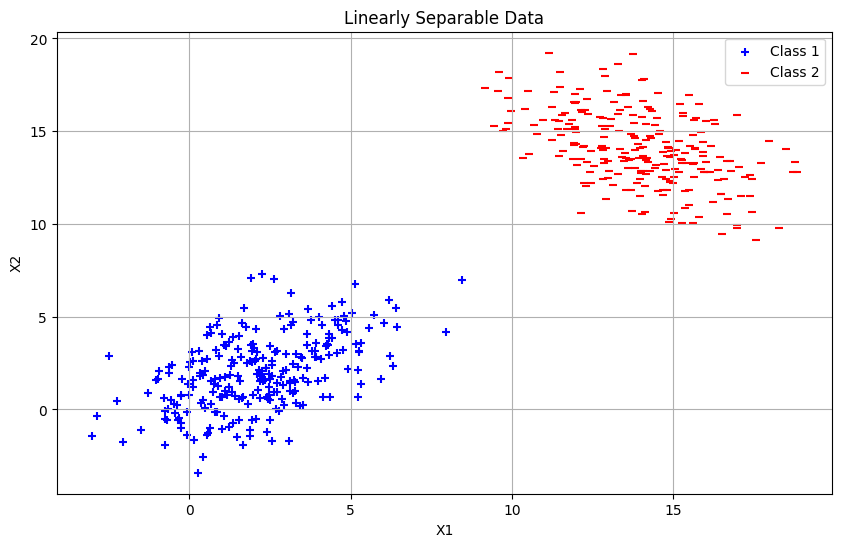

In [10]:
# Plotting the line of the optimal hyperplane
plt.figure(figsize=(10, 6))
plt.scatter(X[:250][:, 0], X[:250][:, 1], color='blue', label='Class 1', marker="+")
plt.scatter(X[250:][:, 0], X[250:][:, 1], color='red', label='Class 2', marker="_")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
class Perceptron:
    def __init__(self, learning_rate=1e-3, epsilon=1e-2, max_iters=1e5):
        self.w = 0
        self.b = 1
        self.grad_w = 0
        self.grad_b = 1
        self.lr = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.prevError = np.inf

    def fit(self, X, y):
        _, num_features = X.shape

        self.w = np.random.rand(num_features)
        self.grad_w = np.random.rand(num_features)

        num_iters = 0
        while(num_iters < self.max_iters and np.abs(self.prevError - self.evaluate(X,y)) > self.epsilon):
            self.prevError = self.evaluate(X,y)
            # calculate gradients
            self.grad_w, self.grad_b = self.calc_gradients(X, y)

            # update w and b values
            self.w = self.w - self.lr * self.grad_w
            self.b = self.b - self.lr * self.grad_b

            num_iters += 1

        print("Ran for ", num_iters, " iterations")

    def calc_gradients(self, X, y):
        new_grad_w = 0
        new_grad_b = 0
        for i in range(len(y)):
            res = (np.dot(self.w, X[i]) + self.b) * y[i]
            if res < 0:
                new_grad_w += y[i] * X[i]
                new_grad_b += y[i]

        new_grad_w *= -1
        new_grad_b *= -1

        return new_grad_w, new_grad_b

    def predict(self, X):
        pred_y = [1 if (np.dot(self.w, x) + self.b) > 0 else -1 for x in X]
        return pred_y

    def evaluate(self, X, y):
        loss = sum(max(0, -y[i]*(np.dot(self.w, X[i])+self.b)) for i in range(len(y)))
        print("loss: ", loss)
        return loss
        

In [8]:
perceptron_classifier = Perceptron()
perceptron_classifier.fit(X, y)

loss:  [3310.22488479]
loss:  [3310.22488479]
loss:  [3156.83835379]
loss:  [3156.83835379]
loss:  [2531.66592112]
loss:  [2531.66592112]
loss:  [1909.22571252]
loss:  [1909.22571252]
loss:  [1290.83916139]
loss:  [1290.83916139]
loss:  [686.65491541]
loss:  [686.65491541]
loss:  [144.48981311]
loss:  [144.48981311]
loss:  [380.01224195]
loss:  [380.01224195]
loss:  [3289.2279581]
loss:  [3289.2279581]
loss:  [2667.47292302]
loss:  [2667.47292302]
loss:  [2050.25774348]
loss:  [2050.25774348]
loss:  [1442.29828166]
loss:  [1442.29828166]
loss:  [850.30129241]
loss:  [850.30129241]
loss:  [305.85006437]
loss:  [305.85006437]
loss:  [5.32759424]
loss:  [5.32759424]
loss:  [0.86642341]
loss:  [0.86642341]
loss:  [0.46966788]
loss:  [0.46966788]
loss:  [0.22851633]
loss:  [0.22851633]
loss:  [0.10768249]
loss:  [0.10768249]
loss:  0
loss:  0
loss:  0
Ran for  20  iterations


In [9]:
print("slope: ", perceptron_classifier.w, " intercept: ", perceptron_classifier.b)

slope:  [-0.27703821 -0.07098322]  intercept:  [2.849]


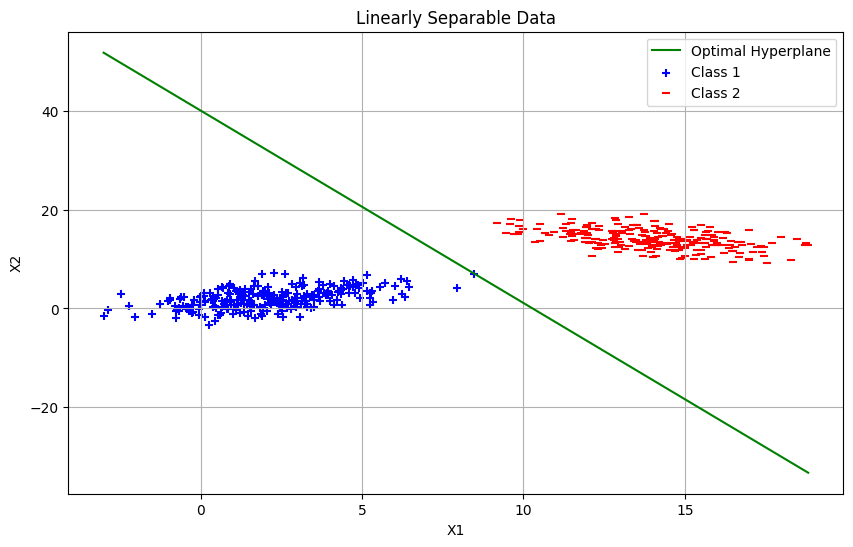

In [10]:
# Coefficients of the hyperplane
coefficients = perceptron_classifier.w

# Intercept of the hyperplane
intercept = perceptron_classifier.b

# Compute slope and intercept of the line
slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]

# Generate data points for plotting the line
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
y_values = slope * x_values + intercept

# Plotting the line of the optimal hyperplane
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='green', linestyle='-', label='Optimal Hyperplane')
plt.scatter(X[:250][:, 0], X[:250][:, 1], color='blue', label='Class 1', marker="+")
plt.scatter(X[250:][:, 0], X[250:][:, 1], color='red', label='Class 2', marker="_")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
class Perceptron:
    def __init__(self, learning_rate=1e-3, epsilon=1e-2):
        self.w = 0
        self.b = 1
        self.grad_w = 0
        self.grad_b = 1
        self.lr = learning_rate

    # this is filled in for you
    def fit(self, X, y):
        _, num_features = X.shape

        self.w = np.random.rand(num_features)
        self.grad_w = np.random.rand(num_features)

        num_iters = 0
        while(self.evaluate(X,y) > 0):
            self.prevError = self.evaluate(X,y)
            # calculate gradients
            self.grad_w, self.grad_b = self.calc_gradients(X, y)

            # update w and b values
            self.w = self.w - self.lr * self.grad_w
            self.b = self.b - self.lr * self.grad_b

            num_iters += 1

        print("Ran for ", num_iters, " iterations")

    def calc_gradients(self, X, y):

        return new_grad_w, new_grad_b

    # fill this in
    # you return pred_y which contains an array of your predictions
    # 1 for positive class and -1 for negative class
    def predict(self, X):
        pred_y = []
        return pred_y

    # fill this in
    # you need to calculate the loss using the equation in the notes
    # 0 if classified correctly
    # -y(w^Tx + b) if classified incorrectly
    # you must do this for all elements in your data, sum up the result and store it in loss
    def evaluate(self, X, y):
        loss = sum(max(0, -y[i]*(np.dot(self.w, X[i])+self.b)) for i in range(len(y)))
        print("loss: ", loss)
        return loss
        

In [29]:
perceptron_classifier = Perceptron()
perceptron_classifier.fit(X, y)

loss:  5713.97364756646
loss:  2774.175072310903
loss:  2149.42075800595
loss:  1529.991995323047
loss:  923.4441937022199
loss:  337.0033216615977
loss:  3.163368919724758
loss:  8.431045267653253
loss:  47.041013747345566
loss:  1355.0144575190905
loss:  754.4483505164465
loss:  204.8828425451947
loss:  1.67019426326443
loss:  57.71066946464184
loss:  70.55388086114486
loss:  3271.8843358348863
loss:  2652.3724682192083
loss:  2041.767230560884
loss:  1438.3532180952752
loss:  851.2319857318764
loss:  317.97056028084637
loss:  12.916021392588599
loss:  0.17754732678594376
loss:  0.05671349059518249
loss:  0
Ran for  24  iterations


In [30]:
print("slope: ", perceptron_classifier.w, " intercept: ", perceptron_classifier.b)

slope:  [-0.14857282 -0.2619856 ]  intercept:  3.142


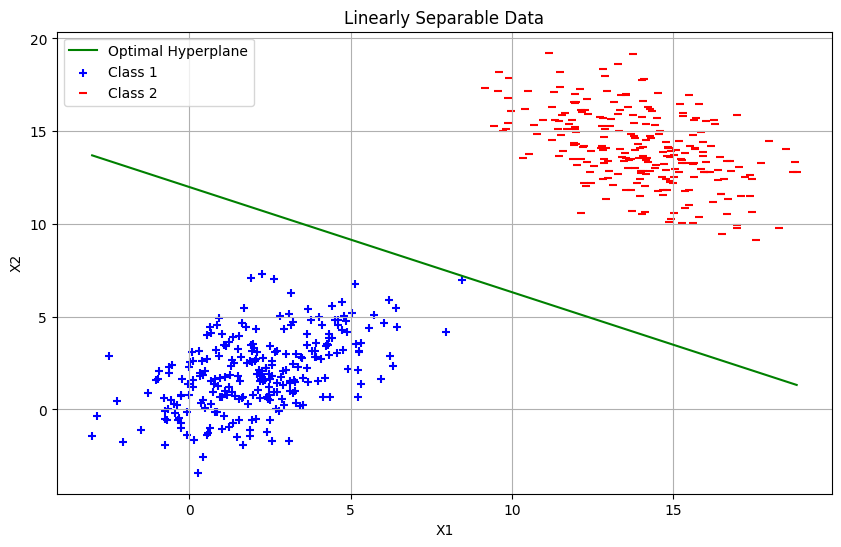

In [31]:
# Coefficients of the hyperplane
coefficients = perceptron_classifier.w

# Intercept of the hyperplane
intercept = perceptron_classifier.b

# Compute slope and intercept of the line
slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]

# Generate data points for plotting the line
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
y_values = slope * x_values + intercept

# Plotting the line of the optimal hyperplane
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='green', linestyle='-', label='Optimal Hyperplane')
plt.scatter(X[:250][:, 0], X[:250][:, 1], color='blue', label='Class 1', marker="+")
plt.scatter(X[250:][:, 0], X[250:][:, 1], color='red', label='Class 2', marker="_")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()